In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import comet_ml
from comet_ml import Experiment

In [3]:
import os
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import CometLogger

In [4]:
from manifoldembedder import *

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [6]:
basedir = '/nobackup/users/sangeon/datasets/jets/jetpairs/simple'


In [7]:
train_file_list = []
val_file_list = []
test_file_list = []
predict_file_list = []

basedir = '/nobackup/users/sangeon/datasets/jets/jetpairs/simple'

for file in os.listdir(basedir):
    if "train" in file:
        train_file_list.append(os.path.join(basedir,file))
    elif "val" in file:
        val_file_list.append(os.path.join(basedir,file))
    elif "predict" in file:
        predict_file_list.append(os.path.join(basedir,file))
    elif "test" in file:
        test_file_list.append(os.path.join(basedir,file))

In [8]:
#train_list = []
#for file in train_file_list:
#    train_list.append(torch.load(file))
#jet_train = torch.utils.data.ConcatDataset(train_list)
#torch.save(jet_train, os.path.join(basedir, 'simple_jettrain_16part.pt'))

#val_list = []
#for file in val_file_list:
#    val_list.append(torch.load(file))
#jet_val = torch.utils.data.ConcatDataset(val_list)
#torch.save(jet_val, os.path.join(basedir, 'simple_jetval_16part.pt'))

#test_list = []
#for file in test_file_list:
#    test_list.append(torch.load(file))
#jet_test = torch.utils.data.ConcatDataset(test_list)
#torch.save(jet_test, f'/nobackup/users/sangeon/datasets/jets/concat_16p_test_temp.pt')

#predict_list = []
#for file in predict_file_list:
#    predict_list.append(torch.load(file))
#jet_predict = torch.utils.data.ConcatDataset(predict_list)
#torch.save(jet_predict, f'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt')

In [9]:
file_dict = {'train':os.path.join(basedir, 'simple_jettrain_16part.pt'),
             'val':os.path.join(basedir, 'simple_jetval_16part.pt'),
             'test':os.path.join(basedir, 'simple_jetval_16part.pt'),
             'predict':os.path.join(basedir, 'simple_jetpredict_16part.pt')}

In [10]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/jet_pair_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/jet_pair_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/jet_pair_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt'}

In [11]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/concat_triplet_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/concat_triplet_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/concat_triplet_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/concat_predict_temp.pt'}

# 16 particles

In [12]:
#file_dict = {'train':'/nobackup/users/sangeon/datasets/jets/concat_16p_train_temp.pt', 'val':'/nobackup/users/sangeon/datasets/jets/concat_16p_val_temp.pt','test':'/nobackup/users/sangeon/datasets/jets/concat_16p_test_temp.pt', 'predict':'/nobackup/users/sangeon/datasets/jets/jet_16p_predict_temp.pt'}

In [13]:
#dataset = torch.load('/nobackup/users/sangeon/datasets/jets/concat_train_temp.pt')

In [14]:
#jetpair_train = DataLoader(dataset, batch_size=10000,shuffle=True,num_workers=4)

# Paper

In [15]:
jet_dm = JetDataModule(file_dict,2500)
#jettriplet_dm = 

In [16]:
#emd = np.array([])
#for i,(_,_,dist) in enumerate(jetpair_train):
#    if i>100:
#        break
#    emd = np.concatenate([emd,dist.data.numpy()])

In [17]:
#emd

In [18]:
#plt.hist(emd)

In [19]:
#d_model, nhead, num_encoder_layers, num_decoder_layers, embed_dim, max_seq_length, pos_dropout, trans_dropout, layer_widths

In [20]:
#lr, npart, embed_dim, hidden_size, num_rnn_layers, layer_widths

In [21]:
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 32, 2 , 2, 2, 2, 8, 0.7,0.7, [500,300,10])
#model = ManifoldEmbedder("jets",3,"Transformer", 0.00054607179632484, 16, 4 , 2, 2, 2, 8, 0.7,0.7, [500,300,10])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 32, 4 , 2, 2, 2, 8, 0.7,0.7, [500,300,10])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 16, 4 , 2, 2, 2, 16, 0.7,0.7, [500,300,10])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, 32, 8 , 4, 4, 2, 16, 0.75,0.75, [500,300,10])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [32, 16, 4, 4, 2, 16, 0.7,0.7, [600,200,200,10]])
#model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [32,4,3,2,2,16,0.25,0.25,[1000,400,20]])
model = ManifoldEmbedder("jets",2,"Transformer", 0.00054607179632484, [32,4,3,3,2,16,0.26,0.26,[1200,450,30]])

#model = ManifoldEmbedder("jets",3, "Transformer", 0.00054607179632484, 32, 8 , 4, 4, 2, 8, 0.5,0.5, [1000,500,10])
#model = ManifoldEmbedder("jets",2,"MLP", 1e-2, 16, 2, [100,100,100,80,40,20,10])
#model = ManifoldEmbedder('jets',2,"GRU", 0.02089296130854041, 16, 2, 40, 40, [1000,500,10])


In [22]:
#model = ManifoldEmbedder.load_from_checkpoint("../training/simpletoyjets_checkpoints/Transformer-paper-finalJHEP4-checkpoint-epoch=12-val_loss=0.40.ckpt")

In [23]:
#model = ManifoldEmbedder.load_from_checkpoint("../training/simpletoyjets_checkpoints/Transformer-paper-finalJHEP4-checkpoint-epoch=00-val_loss=0.52.ckpt")

In [24]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/sangeonpark/metricembedder/87d996b189984baebbbba05078991cc9



In [25]:
comet_logger = CometLogger(
    api_key="CkkrVkSk6Vr2WKlbXIzlkhNlE",
    project_name="metricembedder",
)

CometLogger will be initialized in online mode


In [26]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=0.00, patience=20, verbose=False)

In [27]:
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="/home/sangeon/ToyJetGenerator/training/simpletoyjets_checkpoints",
    filename="Transformer-paper-finalJHEP5-checkpoint-{epoch:02d}-{val_loss:.2f}",
    save_top_k=4,
    mode="min",
)

In [28]:
#trainer = Trainer(gpus=1,callbacks=[PrintCallbacks(),early_stop_callback,checkpoint_callback],logger=comet_logger,auto_lr_find=True)
trainer = Trainer(gpus=1,callbacks=[early_stop_callback,checkpoint_callback],logger=comet_logger,auto_lr_find=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [29]:
#trainer.tune(model, jetpair_dm)

In [30]:
lr_finder = trainer.tuner.lr_find(model, jet_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restoring states from the checkpoint path at /home/sangeon/ToyJetGenerator/training/lr_find_temp_model_3979e4a2-b9b9-4a76-b0b4-4a40ffa03f83.ckpt


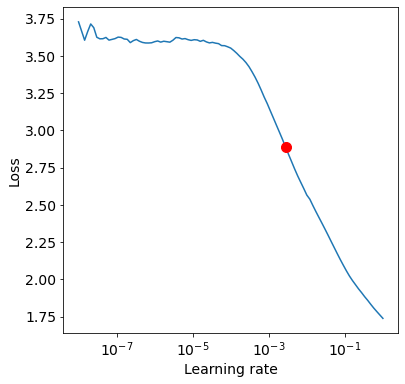

In [31]:
fig = lr_finder.plot(suggest=True)
fig.show()

In [32]:
new_lr = lr_finder.suggestion()

new_lr

model.hparams.learning_rate = new_lr

model.learning_rate = new_lr

model.learning_rate

0.002754228703338169

In [33]:
trainer.fit(model, jet_dm)

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/sangeonpark/metricembedder/87d996b189984baebbbba05078991cc9
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [20] : (0.525928795337677, 3.8936240673065186)
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (3.97 MB)
COMET INFO:  

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/nobackup/users/sangeon/condas/anaconda3/envs/studies/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:685: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [31]:
predictloader = jet_dm.predict_dataloader()

AttributeError: 'JetDataModule' object has no attribute 'jetpair_predict'

In [ ]:
for temp in predictloader:
    print(temp[0][0])

In [ ]:
a = trainer.predict(model, jet_dm)

In [37]:
label = np.array([])
embedding = np.empty((0,2))
for batch in a:
    #print(batch[0].shape)
    #print(batch[1].shape)
    embedding = np.vstack((embedding, batch[0].cpu().numpy()))
    label = np.concatenate([label, batch[1].cpu().numpy()])
    #print(batch[0], batch[1])

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [39]:
embedding[label==2]

array([[0.0463893 , 0.00340425],
       [0.07908557, 0.31210521],
       [0.04708301, 0.00263669],
       ...,
       [0.04615985, 0.00351275],
       [0.04060708, 0.00934134],
       [0.04168124, 0.00784806]])

In [40]:
embedding[label==4]

array([[ 0.23924214, -0.06087665],
       [ 0.2392167 , -0.06085899],
       [ 0.23943287, -0.06100871],
       ...,
       [ 0.23915763, -0.06081804],
       [ 0.23922995, -0.0608682 ],
       [ 0.23921202, -0.06085575]])

In [41]:
embedding[label==3]

array([[ 0.23920341, -0.06084981],
       [ 0.23923418, -0.06087117],
       [ 0.23924971, -0.06088196],
       ...,
       [ 0.23924695, -0.06088004],
       [ 0.2392405 , -0.06087554],
       [ 0.23925039, -0.0608824 ]])

In [42]:
embedding[label==1]

array([[0.07843778, 0.31355336],
       [0.0783096 , 0.31384102],
       [0.07822081, 0.31404054],
       ...,
       [0.0782108 , 0.31406271],
       [0.07830404, 0.31385252],
       [0.07830082, 0.31386128]])

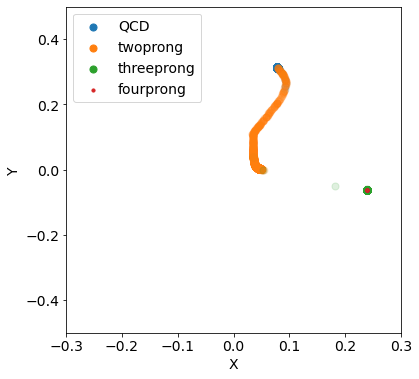

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(embedding[label==1][:10000,0],embedding[label==1][:10000,1],s=50,alpha=0.15,label='QCD')
ax.scatter(embedding[label==2][:10000,0],embedding[label==2][:10000,1],s=50,alpha=0.15,label='twoprong')
ax.scatter(embedding[label==3][:10000,0],embedding[label==3][:10000,1],s=50,alpha=0.15,label='threeprong')
ax.scatter(embedding[label==4][:10000,0],embedding[label==4][:10000,1],s=10,alpha=0.1,label='fourprong')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-0.3,0.3])
ax.set_ylim([-0.5,0.5])
leg = ax.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
#fig.savefig(f'../figures/paper/embedding_simple_toyjet_0.png')

In [107]:
embedding[label==1].shape

(400000, 2)

In [105]:
embedding[label==1][:1000].shape

(1000, 2)

In [47]:
from scipy import stats

def plot_kde(ax, whichlabel, color):
    xmin = embedding[label==whichlabel][:,0].min()
    xmax = embedding[label==whichlabel][:,0].max()
    ymin = embedding[label==whichlabel][:,1].min()
    ymax = embedding[label==whichlabel][:,1].max()
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    kernel = stats.gaussian_kde(embedding[label==whichlabel][:100000].T)
    Z = np.reshape(kernel(positions).T, X.shape)
    Z /= Z.max()
    print(Z.max(),Z.min())
    #ax.imshow(np.rot90(Z),cmap='Blues' , extent=[xmin, xmax, ymin, ymax])
    ax.contour(X,Y,Z,levels=[0.3, 0.5, 0.9, 0.99, 0.99999, 1],colors=color)
    #ax.contour(X,Y,Z,levels=1,colors=color)
    return None


1.0 0.0
1.0 0.0
1.0 0.0


No handles with labels found to put in legend.


1.0 0.0


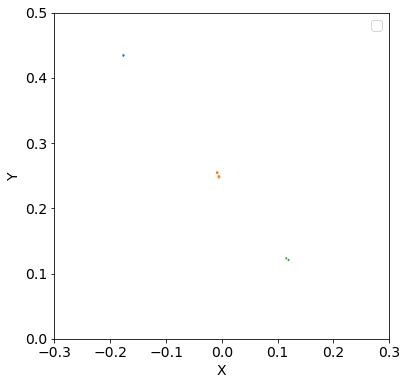

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
####ax.scatter(embedding[label==0][:50,0],embedding[label==0][:50,1],s=200,alpha=0.1,label='0')
####ax.scatter(embedding[label==1][:50,0],embedding[label==1][:50,1],s=200,alpha=0.1,label='1')
#ax.scatter(embedding[label==2][:100,0],embedding[label==2][:100,1],s=200,alpha=0.1,label='2')
#ax.scatter(embedding[label==3][:100,0],embedding[label==3][:100,1],s=200,alpha=0.1,label='3')
#ax.scatter(embedding[label==4][:100,0],embedding[label==4][:100,1],s=200,alpha=0.1,label='4')
####ax.scatter(embedding[label==5][:50,0],embedding[label==5][:50,1],s=200,alpha=0.1,label='5')
####ax.scatter(embedding[label==6][:50,0],embedding[label==6][:50,1],s=200,alpha=0.1,label='6')
#ax.scatter(embedding[label==7][:100,0],embedding[label==7][:100,1],s=200,alpha=0.1,label='7')
#ax.scatter(embedding[label==8][:100,0],embedding[label==8][:100,1],s=200,alpha=0.1,label='8')
####ax.scatter(embedding[label==9][:50,0],embedding[label==9][:50,1],s=200,alpha=0.1,label='9')
#ax.imshow(np.rot90(Z),cmap='Blues' , extent=[xmin, xmax, ymin, ymax])
plot_kde(ax, 1,'C0')
plot_kde(ax, 2,'C1')
plot_kde(ax, 3,'C2')
plot_kde(ax, 4,'C3')


#print(ax.collections[0].set_label("Digit 0"))
#print(ax.collections[6].set_label("Digit 1"))
#print(ax.collections[11].set_label("Digit 5"))
#print(ax.collections[15].set_label("Digit 6"))


#print(ax.collections[1].get_color()=='C0')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim([-0.3,0.3])
ax.set_ylim([0,0.5])
ax.legend()
#fig.savefig(f'../figures/paper/embedding_simpletoyjet.png')
#fig.savefig(f'../figures/paper/embedding_simpletoyjet.pdf')

(-100.0, 100.0)

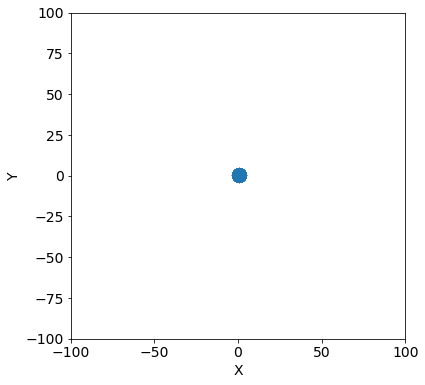

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.scatter(embedding[label==0][:1000,0],embedding[label==0][:1000,1],s=200,alpha=0.05)
ax.scatter(embedding[label==1][:100,0],embedding[label==1][:100,1],s=200,alpha=0.05)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
#fig.savefig(f'{path}/{name}.png')

In [42]:
embedding[label==0]

array([[34.16513062, -1.49830151],
       [34.1387825 , -1.53783011],
       [34.53158569, -0.93025315],
       ...,
       [34.1339798 , -1.54286742],
       [30.40222168,  5.07749081],
       [34.23294067, -1.4946003 ]])

In [43]:
embedding[label==1]

array([[34.15142822, -1.52005196],
       [34.01434708, -1.64321101],
       [34.10200119, -1.60349095],
       ...,
       [34.09588623, -1.59495401],
       [34.40365982, -1.46968496],
       [34.20943451, -1.48509216]])

In [41]:
label

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
experiment.end()

In [ ]:
import tensorboard

In [11]:
%load_ext tensorboard

In [17]:
%tensorboard --logdir ./lightning_logs

Reusing TensorBoard on port 6007 (pid 2019324), started 0:02:41 ago. (Use '!kill 2019324' to kill it.)